In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [248]:
housing_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/76e1a761-6818-4b36-bfd4-174f154c6952/Housing.csv')
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [249]:
housing_data.shape

(545, 13)

In [250]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [251]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


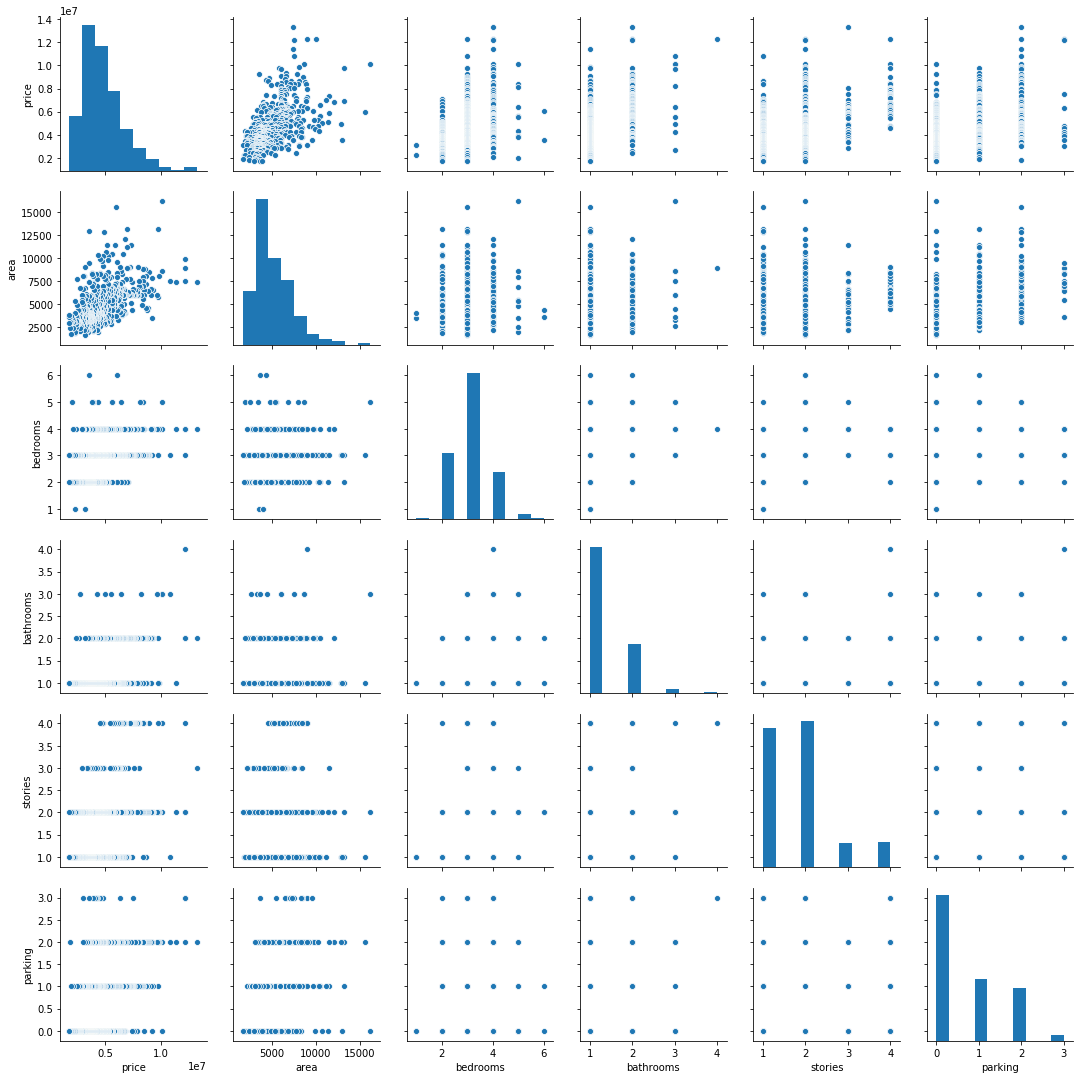

In [252]:
sns.pairplot(housing_data)
plt.show()

##### Cateogorical variables variation with price.

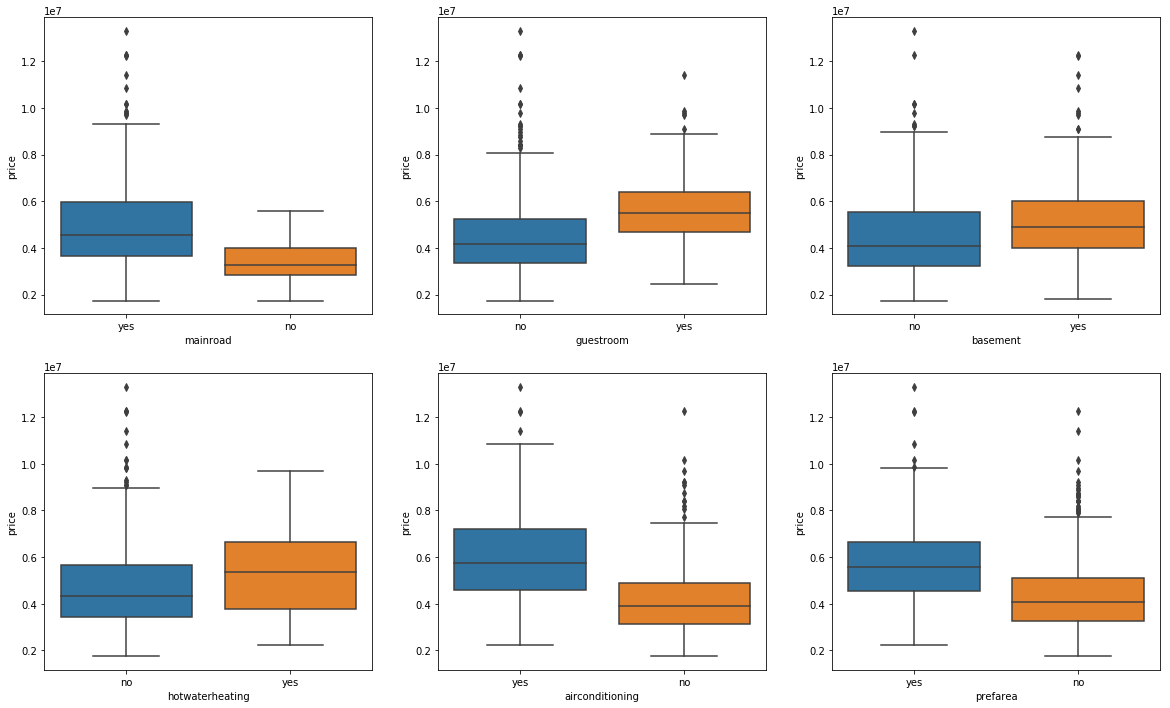

In [253]:
# area                545 non-null int64
# bedrooms            545 non-null int64
# bathrooms           545 non-null int64
# stories             545 non-null int64
# mainroad            545 non-null object
# guestroom           545 non-null object
# basement            545 non-null object
# hotwaterheating     545 non-null object
# airconditioning     545 non-null object
# parking             545 non-null int64
# prefarea            545 non-null object
# furnishingstatus    545 non-null object

plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x='mainroad', y='price', data=housing_data)


plt.subplot(2, 3, 2)
sns.boxplot(x='guestroom', y='price', data=housing_data)

plt.subplot(2, 3, 3)
sns.boxplot(x='basement', y='price', data=housing_data)

plt.subplot(2, 3, 4)
sns.boxplot(x='hotwaterheating', y='price', data=housing_data)

plt.subplot(2, 3, 5)
sns.boxplot(x='airconditioning', y='price', data=housing_data)

plt.subplot(2, 3, 6)
sns.boxplot(x='prefarea', y='price', data=housing_data)
plt.show()

###### Relation b/w aircondition, furnished and price

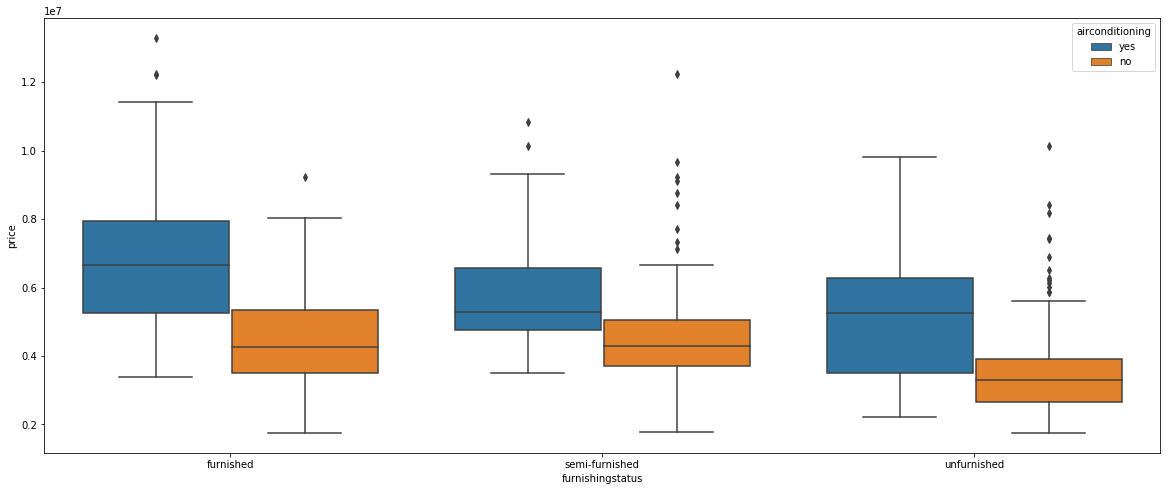

In [254]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='furnishingstatus', y='price', hue='airconditioning', data=housing_data)
plt.show()

### Step 3: Data preparation:

* There are columns with only values as y/n. 
* Those columns can be made as 0/1

In [255]:
_columns = ['mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'prefarea']
def map_boolean(x):
    return x.map({'yes': 1, 'no': 0})
    
housing_data[_columns] = housing_data[_columns].apply(map_boolean)
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


###### Categorical variable furnishing status with dummy variable

In [256]:
status = pd.get_dummies(housing_data['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


**We don't need unfurnished status column as furnished & semi-furnished both "0" means unfurnished same can be applied to any variable**

In [257]:
_dummy_vars = pd.get_dummies(housing_data['furnishingstatus'], drop_first=True)
_dummy_vars.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [258]:
housing_data = pd.concat([housing_data, _dummy_vars], axis=1)
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [259]:
housing_data.drop(columns=['furnishingstatus'], axis=1, inplace=True)
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [260]:
housing_data_train, housing_data_test = train_test_split(housing_data, train_size=0.7, test_size=0.3, random_state=100)

In [261]:
housing_data_train.shape

(381, 14)

In [262]:
housing_data_test.shape

(164, 14)

### Scalling the feature:

we have variables with wide range of data. Area is huge and difficut to compare with the other variables with 0/1 values. One more reason to apply scaling is to fasten the alogrithm by reducing the gradient descendant time for smaller variables. 

**Scaling can be performed with two ways**
1. MinMax scaling
2. Standardisation scaling

**Let's try to use MinMax scaling**

In [263]:
from sklearn.preprocessing import MinMaxScaler

In [264]:
minmax_scaler = MinMaxScaler()

In [265]:
_vars = ['price', 'area', 'bedrooms','bathrooms','stories', 'parking']
housing_data_train[_vars] = minmax_scaler.fit_transform(housing_data_train[_vars])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [266]:
housing_data_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

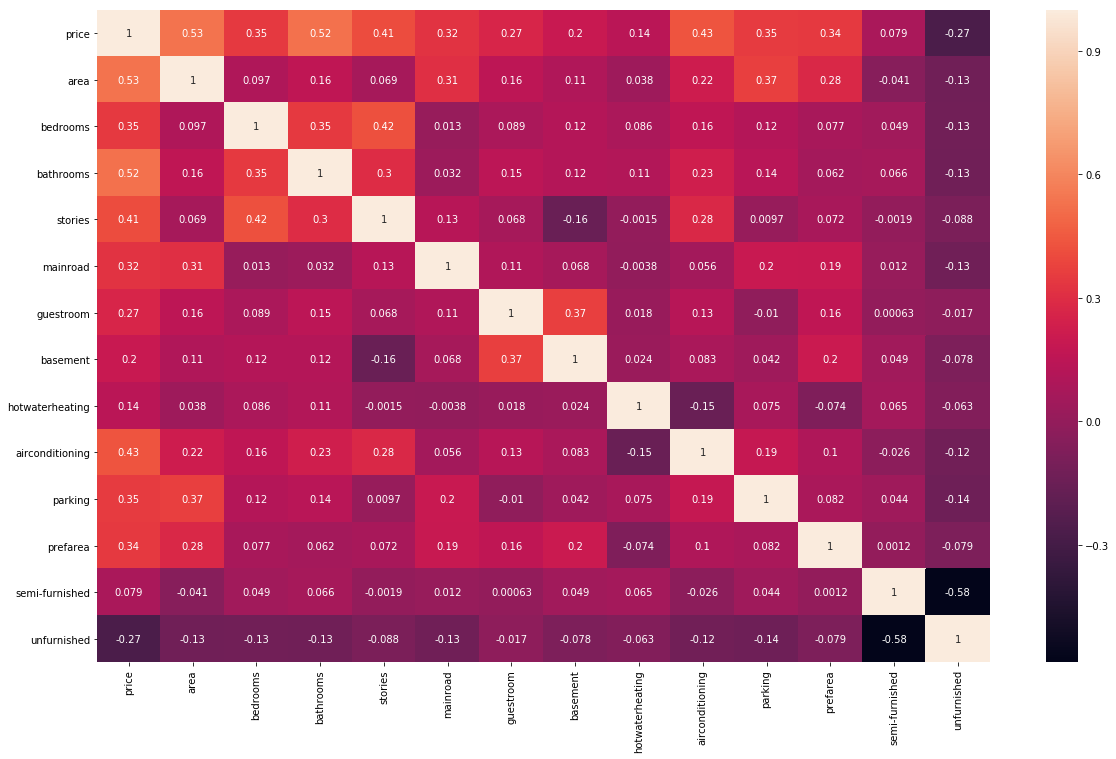

In [267]:
plt.figure(figsize=(20, 12))
sns.heatmap(housing_data_train.corr(), annot=True)
plt.show

### Building A Model:

**Steps:**
1. train set remove y variable 
2. add constant
3. Ordered least square method invoke

Train data remove y variable

In [268]:
y_train_data = housing_data_train.pop('price')


In [269]:
x_train_data = housing_data_train
x_train_data_lm = sm.add_constant(x_train_data[['area']])

In [270]:
y_train_data.shape

(381,)

In [271]:
x_train_data_lm.head()

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015


In [272]:
housing_model = sm.OLS(y_train_data, x_train_data_lm).fit()

In [273]:
housing_model.params

const    0.126894
area     0.462192
dtype: float64

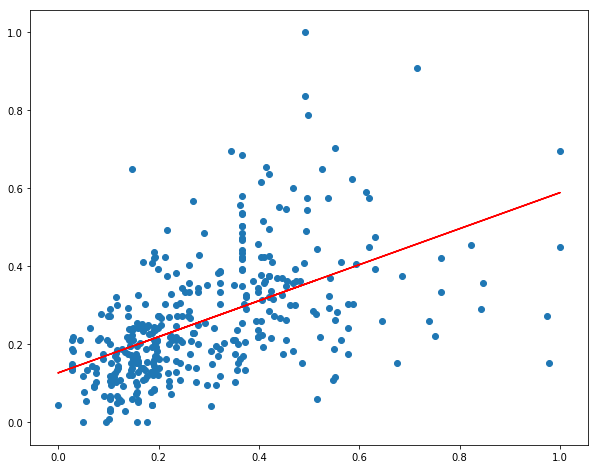

In [274]:
plt.figure(figsize=(10, 8))
plt.scatter(x=x_train_data_lm.area, y=y_train_data)
plt.plot(x_train_data_lm.area, 0.126894 + 0.462192*x_train_data_lm.area, 'r')
plt.show()

In [275]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 19 May 2019   Prob (F-statistic):           3.15e-29
Time:                        03:44:11   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

**Add more features to increase the efficiency**

In [276]:
x_train_data = housing_data_train[['area', 'bathrooms']]
x_train_data_lm1 = sm.add_constant(x_train_data)
housing_model = sm.OLS(y_train_data, x_train_data_lm1).fit()

In [277]:
housing_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [278]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 19 May 2019   Prob (F-statistic):           2.51e-54
Time:                        03:44:11   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [279]:

x_train_data = housing_data_train[['area', 'bedrooms', 'bathrooms']]
x_train_data_lm2 = sm.add_constant(x_train_data)
housing_model = sm.OLS(y_train_data, x_train_data_lm2).fit()

In [280]:
housing_model.params

const        0.041352
area         0.392211
bedrooms     0.181863
bathrooms    0.259978
dtype: float64

In [281]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 19 May 2019   Prob (F-statistic):           3.12e-57
Time:                        03:44:11   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

#### Variance inflation factor:

In [282]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [283]:
_columns = housing_data_train.columns
vif = pd.DataFrame()
vif['Features'] = _columns
vif['VIF'] = [variance_inflation_factor(housing_data_train.values, i) for i in range(housing_data_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by=['VIF'], ascending=False)

In [284]:
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


#### Building model with all the variables

In [285]:
housing_data_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [286]:
housing_data_train_constant = sm.add_constant(housing_data_train)
housing_regression = sm.OLS(y_train_data, housing_data_train_constant).fit()

In [287]:
print(housing_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 19 May 2019   Prob (F-statistic):           8.83e-83
Time:                        03:44:11   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

**Semi-furnished column is not having any VFI which is independent variable and has High p-value. It can be removed**

##### Drop semi-furnished column

In [288]:
x_train = housing_data_train.drop('semi-furnished', axis=1)

In [289]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [290]:
x_train_constant = sm.add_constant(x_train)
housing_regression = sm.OLS(y_train_data, x_train_constant).fit()

In [291]:
print(housing_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 19 May 2019   Prob (F-statistic):           1.07e-83
Time:                        03:44:11   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [292]:
_columns = x_train.columns
vif = pd.DataFrame()
vif['Features'] = _columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by=['VIF'], ascending=False)

In [293]:
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


##### Bedrooms has high variance inflention factor and high p-value so it's candidate for multicolinearity

In [294]:
x_train.drop('bedrooms', axis=1, inplace=True)

In [295]:
x_train.columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [296]:
x_train_constant = sm.add_constant(x_train)
housing_regression = sm.OLS(y_train_data, x_train_constant).fit()

In [297]:
print(housing_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 19 May 2019   Prob (F-statistic):           2.73e-84
Time:                        03:44:11   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [298]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [299]:
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


#### Lets drop basement as it has high P-Value

In [300]:
x_train.drop('basement', axis=1, inplace=True)

**Build the model again**

In [301]:
x_train_constant = sm.add_constant(x_train)
housing_regression = sm.OLS(y_train_data, x_train_constant).fit()

In [302]:
print(housing_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 19 May 2019   Prob (F-statistic):           3.13e-84
Time:                        03:44:11   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

#### All of the P-values are with in the range 

In [303]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


#### All Variance inflation factors are also with in the range <5

### Residual analysis for train Data:

In [304]:
y_train_predicted = housing_regression.predict(x_train_constant)

In [305]:
y_train_predicted.head()

359    0.115965
19     0.476552
159    0.328813
35     0.517770
28     0.450897
dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


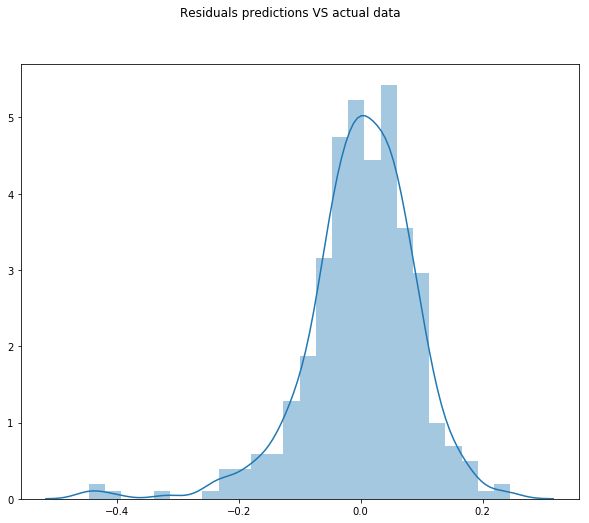

In [306]:
fig = plt.figure(figsize=(10,8))
sns.distplot(y_train_predicted-y_train_data)
fig.suptitle('Residuals predictions VS actual data')
fig.show()

### Making predictions using the model

In [307]:
_prediction_columns = x_train.columns
_prediction_columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [309]:
#====> Apply scaling
#====> 
_scaling_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
housing_data_test[_scaling_columns] = minmax_scaler.transform(housing_data_test[_scaling_columns])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [310]:
housing_data_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,1.596562e+06,-0.151062,-0.161295,0.063415,0.402439,0.865854,0.195122,0.347561,0.030488,0.353659,-0.128049,0.237805,0.420732,0.329268
std,6.624951e+05,0.000209,0.000065,0.112432,0.414011,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,6.066667e+05,-0.151372,-0.161387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,0.000000,0.000000,0.000000
25%,1.131667e+06,-0.151211,-0.161299,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,0.000000,0.000000,0.000000
50%,1.453667e+06,-0.151101,-0.161299,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,0.000000,0.000000,0.000000
75%,1.919167e+06,-0.150965,-0.161299,0.200000,0.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.083333e+06,-0.150113,-0.161123,0.600000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000


In [311]:
housing_data_test_price = housing_data_test.pop('price')

In [316]:
_predective_columns =  ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x_test_const = sm.add_constant(housing_data_test[x_train.columns])
x_test_const.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,-0.151266,0.0,0.5,1,0,0,0,-0.333333,1,0
54,1.0,-0.150996,0.2,0.5,1,1,0,1,0.000000,0,0
171,1.0,-0.150626,0.0,0.0,1,0,0,0,0.000000,1,0
244,1.0,-0.151055,0.0,0.5,1,1,0,0,-0.333333,1,0
268,1.0,-0.151087,0.0,0.5,1,0,0,1,-0.333333,0,0


In [321]:
y_test_predicted = housing_regression.predict(x_test_const)

### Model evaluation: 

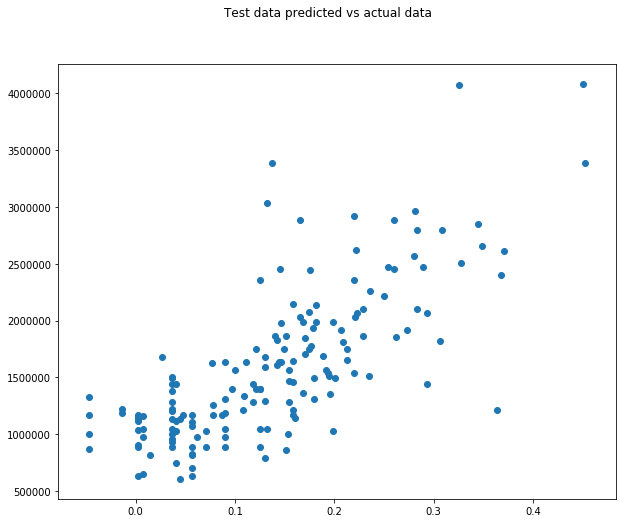

In [324]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test_predicted, housing_data_test_price)
plt.suptitle('Test data predicted vs actual data')
plt.show()